# LLMs Transfer Learning

### perform sentiment analysis on the IMDb dataset using a pre-trained model from Hugging Face.

Based on the documentation available at: https://huggingface.co

In [1]:
# Install necessary libriaries
#!pip install transformers datasets torch accelerate evaluate

# Import necessary libriaries
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer
from datasets import load_dataset, Dataset
from torch.utils.data import DataLoader
import evaluate
import re
import torch
import warnings
warnings.filterwarnings("ignore")

## 1. Load the IMDb Dataset

In [2]:
from datasets import load_dataset

data = load_dataset('imdb')
data

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

## 2. Preprocess text

In [3]:
# Define a function to preprocess our messages
def preprocess_text(text):
    
    ## 1. Lowercase
    text = text.lower()
    
    ## 2. Remove HTML tags
    text = re.sub("<.*?>"," ", text)

    ## 3. Replace contractions with full words
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)

    # Delete newline characters
    text = text.replace('\n', ' ')
    # Remove redundant spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [4]:
# Implement text cleaning

data = data.map(lambda x: {'text': preprocess_text(x['text'])})

## 3. Select a Pre-Trained Model from Hugging Face
I choose `distilbert-base-uncased-finetuned-sst-2-english` pre-trained model for this project task, sentiment analysis.

## 4. Use Pipelines for making Inferences

In [5]:
# pip install transformers

from transformers import pipeline

# Initialize the pipeline with the sentiment-analysis task
sentiment_pipeline = pipeline(task='sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Sample data for inference
sample_data = data['test']['text'][:10]  # Let's take the first 10 reviews from the test set
predictions = sentiment_pipeline(sample_data)

In [6]:
predictions

[{'label': 'NEGATIVE', 'score': 0.9995735287666321},
 {'label': 'POSITIVE', 'score': 0.8715704083442688},
 {'label': 'NEGATIVE', 'score': 0.9997226595878601},
 {'label': 'NEGATIVE', 'score': 0.9987479448318481},
 {'label': 'POSITIVE', 'score': 0.9956738352775574},
 {'label': 'NEGATIVE', 'score': 0.997575581073761},
 {'label': 'NEGATIVE', 'score': 0.9859204888343811},
 {'label': 'NEGATIVE', 'score': 0.999291181564331},
 {'label': 'NEGATIVE', 'score': 0.9996867179870605},
 {'label': 'NEGATIVE', 'score': 0.9997699856758118}]

## 5. Inspect the Predictions

In [7]:
for review, prediction in zip(sample_data, predictions):
    print(f"Review: {review}")
    print(f"Sentiment: {prediction['label']}, Confidence: {prediction['score']}\n")

Review: i love sci-fi and am willing to put up with a lot. sci-fi movies/tv are usually underfunded, under-appreciated and misunderstood. i tried to like this, i really did, but it is to good tv sci-fi as babylon 5 is to star trek (the original). silly prosthetics, cheap cardboard sets, stilted dialogues, cg that does not match the background, and painfully one-dimensional characters cannot be overcome with a isci-fi' setting. (i am sure there are those of you out there who think babylon 5 is good sci-fi tv. it is not. it is clichéd and uninspiring.) while us viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. star trek). it may treat important issues, yet not as a serious philosophy. it is really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. their actions and reactions are wooden and predictable, often painful to watch. the makers of earth know it is rubbish as they

## 6. Word Cloud for Top reviewed 

In [8]:
import pandas as pd
df = pd.DataFrame(data['train'])
imdb_positive = df[df['label'] == 1]
imdb_negative = df[df['label'] == 0]

In [9]:
imdb_positive.head()

,text,label
12500,zentropa has much in common with the third man...,1
12501,zentropa is the most original movie i have see...,1
12502,lars von trier is never backward in trying out...,1
12503,*contains spoilers due to me having to describ...,1
12504,that was the first thing that sprang to mind a...,1


In [10]:
imdb_negative.head()

,text,label
0,i rented i am curious-yellow from my video sto...,0
1,"""i am curious: yellow"" is a risible and preten...",0
2,if only to avoid making this type of film in t...,0
3,this film was probably inspired by godard is m...,0
4,"oh, brother...after hearing about this ridicul...",0


In [12]:
from nltk.corpus import stopwords
import nltk

# Download the required NLTK data files
nltk.download('stopwords')
stopwords_list = set(stopwords.words('english'))
customwords = {'film', 'movie', 'one', 'see', 'watch','would','like','make','films','even','also','get','could'}
all_stopwords = stopwords_list.union(customwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vinh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


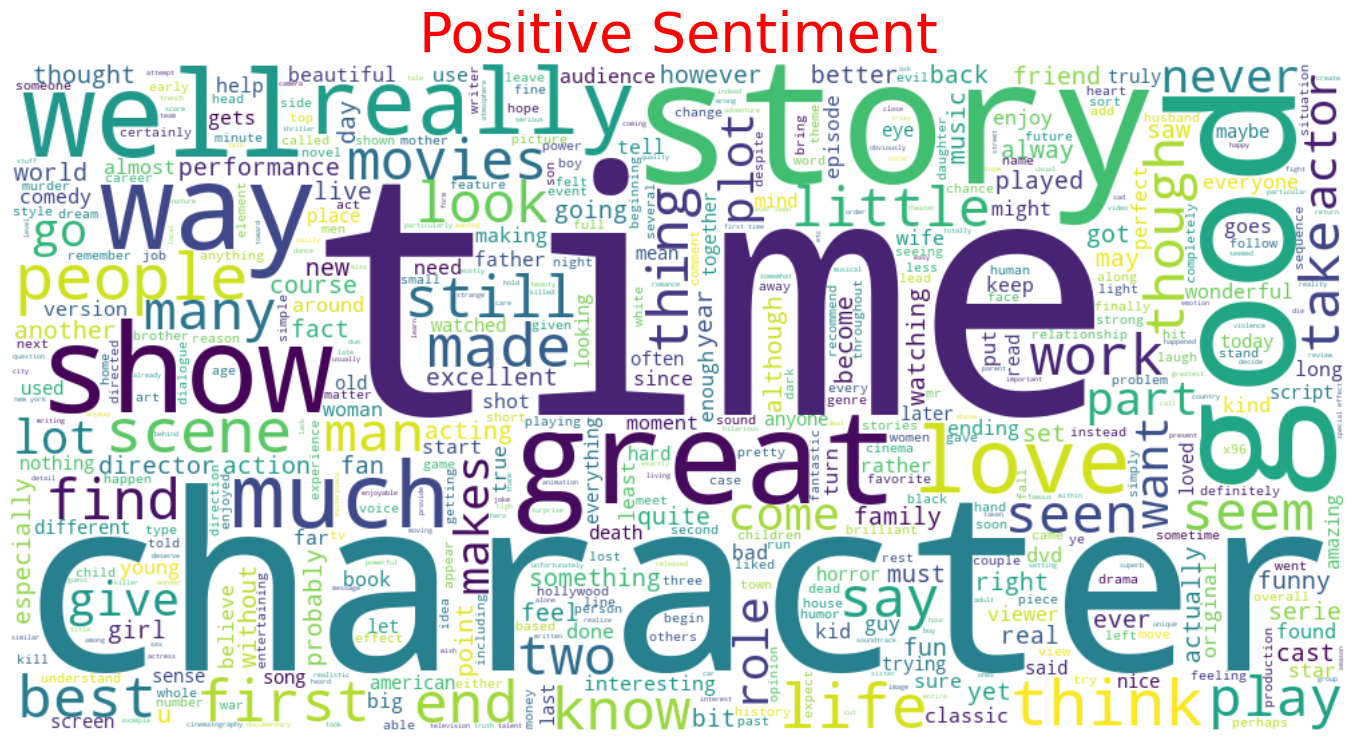

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=500, random_state=1, max_words=500, background_color='white', stopwords=all_stopwords)
wordcloud.generate(str(set(imdb_positive['text'])))

# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Positive Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

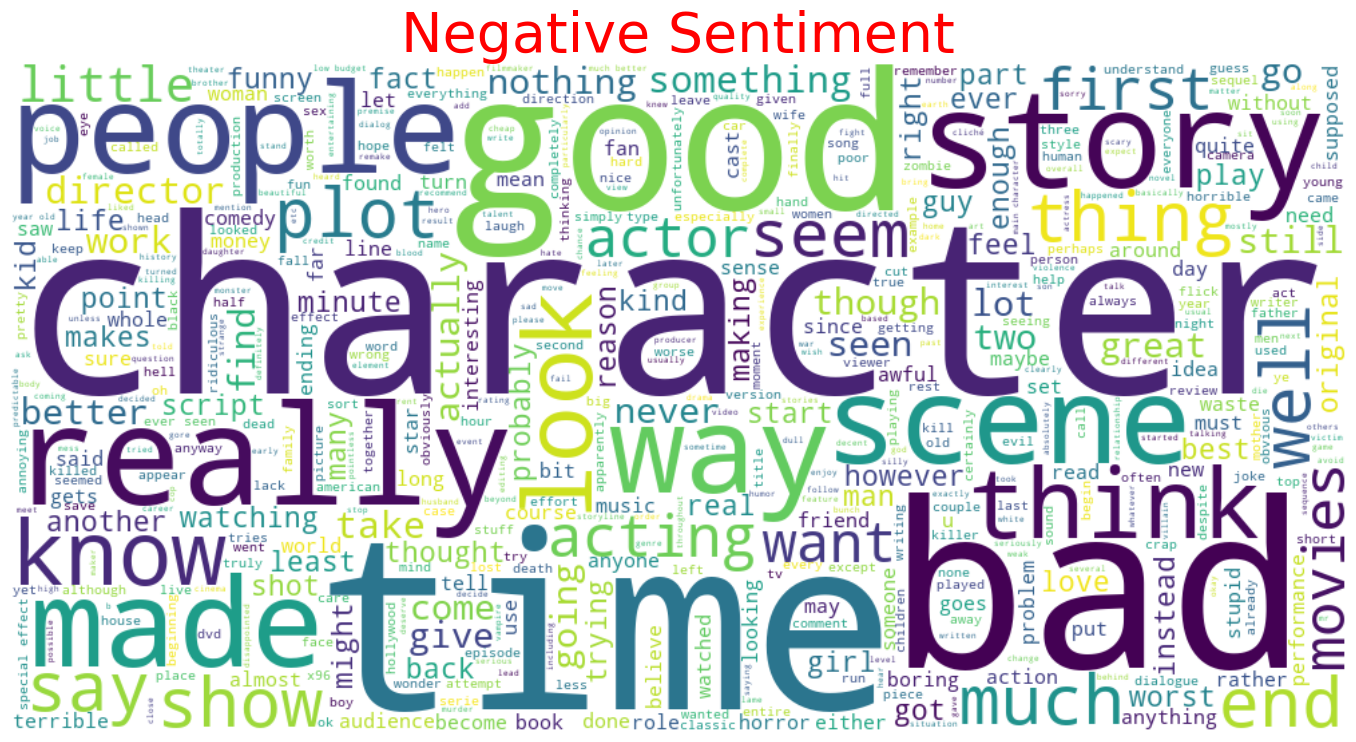

In [14]:
wordcloud = WordCloud(width=1000, height=500, random_state=1, max_words=500, background_color='white', stopwords=all_stopwords)
wordcloud.generate(str(set(imdb_negative['text'])))

# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Negative Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()